In [ ]:
import pandas as pd
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
for i in range(0,len(fraud['Urban'])):
    if fraud.iloc[i,2] > 30000:
        fraud.iloc[i,2] = 'Good'
    else:
        fraud.iloc[i,2] = 'Risky'
col = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Taxable.Income']
fraud = fraud[col]
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [ ]:
copy.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Taxable.Income     0
Prediction         0
dtype: int64

In [ ]:
copy = fraud.copy()
copy['Taxable.Income'] = copy['Taxable.Income'].map({'Good':1,'Risky':0})
copy['Marital.Status'] = copy['Marital.Status'].map({'Single':0,'Divorced':1,'Married':2})
copy['Undergrad'] = copy['Undergrad'].map({'NO':0,'YES':1})
copy['Urban'] = copy['Urban'].map({'NO':0,'YES':1})
copy

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1
...,...,...,...,...,...,...
595,1,1,39492,7,1,1
596,1,1,55369,2,1,1
597,0,1,154058,0,1,1
598,1,2,180083,17,0,1


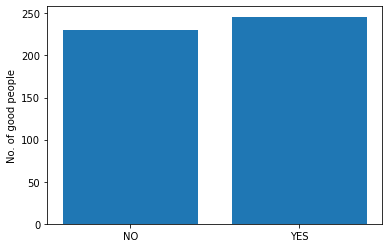

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.sort(fraud['Undergrad'].unique())
y = copy[['Undergrad','Taxable.Income']].groupby('Undergrad').sum()['Taxable.Income']
plt.bar(x,y)
plt.ylabel('No. of good people')
plt.show()

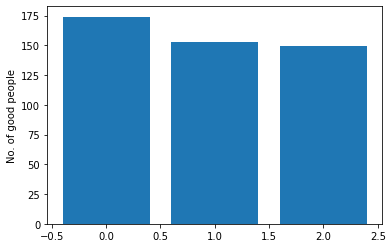

In [ ]:
x = np.sort(copy['Marital.Status'].unique())
y = copy[['Marital.Status','Taxable.Income']].groupby('Marital.Status').sum()['Taxable.Income']
plt.bar(x,y)
plt.ylabel('No. of good people')
plt.show()


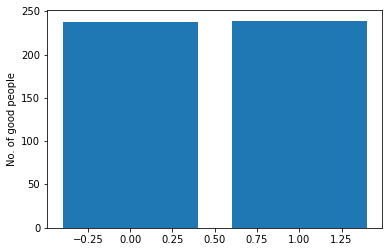

In [ ]:
x = np.sort(copy['Urban'].unique())
y = copy[['Urban','Taxable.Income']].groupby('Urban').sum()['Taxable.Income']
plt.bar(x,y)
plt.ylabel('No. of good people')
plt.show()

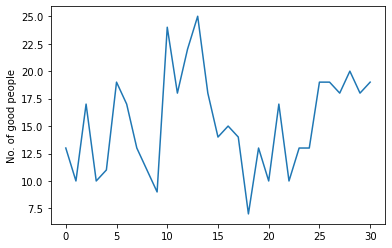

In [ ]:
import numpy as np
fn = copy[['Work.Experience','Taxable.Income']].groupby('Work.Experience').sum()
plt.plot(fn)
plt.ylabel('No. of good people')
plt.show()

In [ ]:
perc = copy['Taxable.Income'].sum()*100/len(fraud['Taxable.Income'])
print(perc," % of people have good taxable income")

79.33333333333333  % of people have good taxable income


In [ ]:
copy['Marital.Status'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
fraud['Marital.Status'].value_counts()*100/fraud['Marital.Status'].value_counts().sum()

Single      36.166667
Married     32.333333
Divorced    31.500000
Name: Marital.Status, dtype: float64

In [ ]:
fraud[fraud['Taxable.Income']=='Good']['Marital.Status'].value_counts()*100/fraud[fraud['Taxable.Income']=='Good']['Marital.Status'].value_counts().sum()

Single      36.554622
Divorced    32.142857
Married     31.302521
Name: Marital.Status, dtype: float64

36% of people are single

36% of good people are singles

32% of people are married

32% of good people are singles

31% of people are divorced

31% of good people are singles

In [ ]:
copy.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
Undergrad,1.000000,-0.008231,0.079579,-0.005362,-0.000267,-0.012523
Marital.Status,-0.008231,1.000000,-0.005193,0.029399,-0.017834,-0.033622
City.Population,0.079579,-0.005193,1.000000,0.013135,-0.040098,-0.012225
Work.Experience,-0.005362,0.029399,0.013135,1.000000,-0.094559,0.001972
Urban,-0.000267,-0.017834,-0.040098,-0.094559,1.000000,-0.004830
Taxable.Income,-0.012523,-0.033622,-0.012225,0.001972,-0.004830,1.000000


In [ ]:
x= copy.drop('Taxable.Income',axis = 1)
y = copy['Taxable.Income'] 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
prediction = DT(criterion = 'entropy').fit(x_train,y_train).predict(x)

In [ ]:
fraud['Prediction']= prediction
copy['Prediction'] = prediction
fraud['Prediction'] = fraud['Prediction'].map({0:'Good',1:'Risky'})
fraud

C:\Users\HP\AppData\Local\Temp\ipykernel_4556\398718939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Prediction']= prediction
C:\Users\HP\AppData\Local\Temp\ipykernel_4556\398718939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Prediction'] = fraud['Prediction'].map({0:'Good',1:'Risky'})


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Prediction
0,NO,Single,50047,10,YES,Good,Risky
1,YES,Divorced,134075,18,YES,Good,Risky
2,NO,Married,160205,30,YES,Good,Risky
3,YES,Single,193264,15,YES,Good,Risky
4,NO,Married,27533,28,NO,Good,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good,Risky
596,YES,Divorced,55369,2,YES,Good,Risky
597,NO,Divorced,154058,0,YES,Good,Risky
598,YES,Married,180083,17,NO,Good,Risky


In [ ]:
incorrect = sum(abs(copy['Taxable.Income']-copy['Prediction']))
eficay = (600-incorrect)*100/600
print('The model is ',eficay,'% effecient.')

The model is  93.33333333333333 % effecient.
